In [79]:
#import library yang diperlukan
from operator import index
import pandas as pd
import csv
import numpy as np
# from predatatestcaca import predict, testing, mydb
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('DataSiapPOS.csv', index_col=0)
class_labels = pd.read_csv('readytfidf3.csv')
class_labels = class_labels['Status']
df_new = pd.concat([df, class_labels], axis=1)
df_new = df_new.sample(frac = 1)
# print(df_new['Status'])
X = df_new.drop(['Status'], axis=1)
y = df_new['Status']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [75]:
svm = SVC(kernel='rbf', random_state=1)
svm.fit(X_train, y_train)
print('Akurasi setelah pakai POS : ',svm.score(X_test, y_test))
hasil = svm.predict(X_test)

Akurasi setelah pakai POS :  0.841991341991342


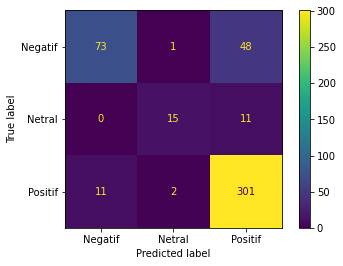

In [87]:
plot_confusion_matrix(svm, X_test, y_test)

In [86]:
print(confusion_matrix(y_test, hasil))
print(classification_report(y_test, hasil))

[[ 73   1  48]
 [  0  15  11]
 [ 11   2 301]]
              precision    recall  f1-score   support

     Negatif       0.87      0.60      0.71       122
      Netral       0.83      0.58      0.68        26
     Positif       0.84      0.96      0.89       314

    accuracy                           0.84       462
   macro avg       0.85      0.71      0.76       462
weighted avg       0.84      0.84      0.83       462

